## Visualisations 

In [108]:
#import libarries 
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px 
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

In [109]:
df = pd.read_csv('df.csv')

In [110]:
df.head()

,area,year,barley,beef_and_buffalo_meat_primary,cereals_primary,eggs_primary,fruit_primary,meat_poultry,milk_total,potatoes,sheep_and_goat_meat,vegetables_primary,wheat,temp_change,people_employed_000,pesticide_used_tonnes,total_precipitation,total_population,agriculture_value,country_code
0,Austria,2000-01-01,3819.5,3031.0,5403.9,165011.0,16294.6,17063.0,47916.0,29262.7,204.0,38431.1,4468.8,1.774,766.87,3563.2,1271.30250,8010.428,2443.834497,AUT
1,Austria,2001-01-01,4655.3,2993.0,5856.2,164992.0,15484.6,17531.0,49589.0,30039.4,212.0,40500.1,5241.2,1.508,718.74,3132.2,1231.89840,8039.626,2527.762615,AUT
2,Austria,2002-01-01,4286.6,2995.0,5831.0,164986.0,16201.2,17664.0,50362.0,30383.2,213.0,41954.2,4966.7,1.542,703.31,3079.2,1339.83100,8078.992,2489.281305,AUT
3,Austria,2003-01-01,4155.9,3033.0,5255.4,165013.0,16950.5,17718.0,51759.0,26528.7,211.0,37718.6,4380.1,1.474,734.47,3384.9,964.65704,8120.104,2926.230271,AUT
4,Austria,2004-01-01,5261.7,3058.0,6495.5,165005.0,17905.3,18297.0,54121.0,31611.7,208.0,40853.2,5923.4,0.840,716.11,3301.7,1228.85990,8171.217,3375.140464,AUT


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   area                           594 non-null    object 
 1   year                           594 non-null    object 
 2   barley                         594 non-null    float64
 3   beef_and_buffalo_meat_primary  594 non-null    float64
 4   cereals_primary                594 non-null    float64
 5   eggs_primary                   594 non-null    float64
 6   fruit_primary                  594 non-null    float64
 7   meat_poultry                   594 non-null    float64
 8   milk_total                     594 non-null    float64
 9   potatoes                       594 non-null    float64
 10  sheep_and_goat_meat            594 non-null    float64
 11  vegetables_primary             594 non-null    float64
 12  wheat                          594 non-null    flo

In [112]:
df.columns

Index(['area', 'year', 'barley', 'beef_and_buffalo_meat_primary',
       'cereals_primary', 'eggs_primary', 'fruit_primary', 'meat_poultry',
       'milk_total', 'potatoes', 'sheep_and_goat_meat', 'vegetables_primary',
       'wheat', 'temp_change', 'people_employed_000', 'pesticide_used_tonnes',
       'total_precipitation', 'total_population', 'agriculture_value',
       'country_code'],
      dtype='object')

# Visualisations 

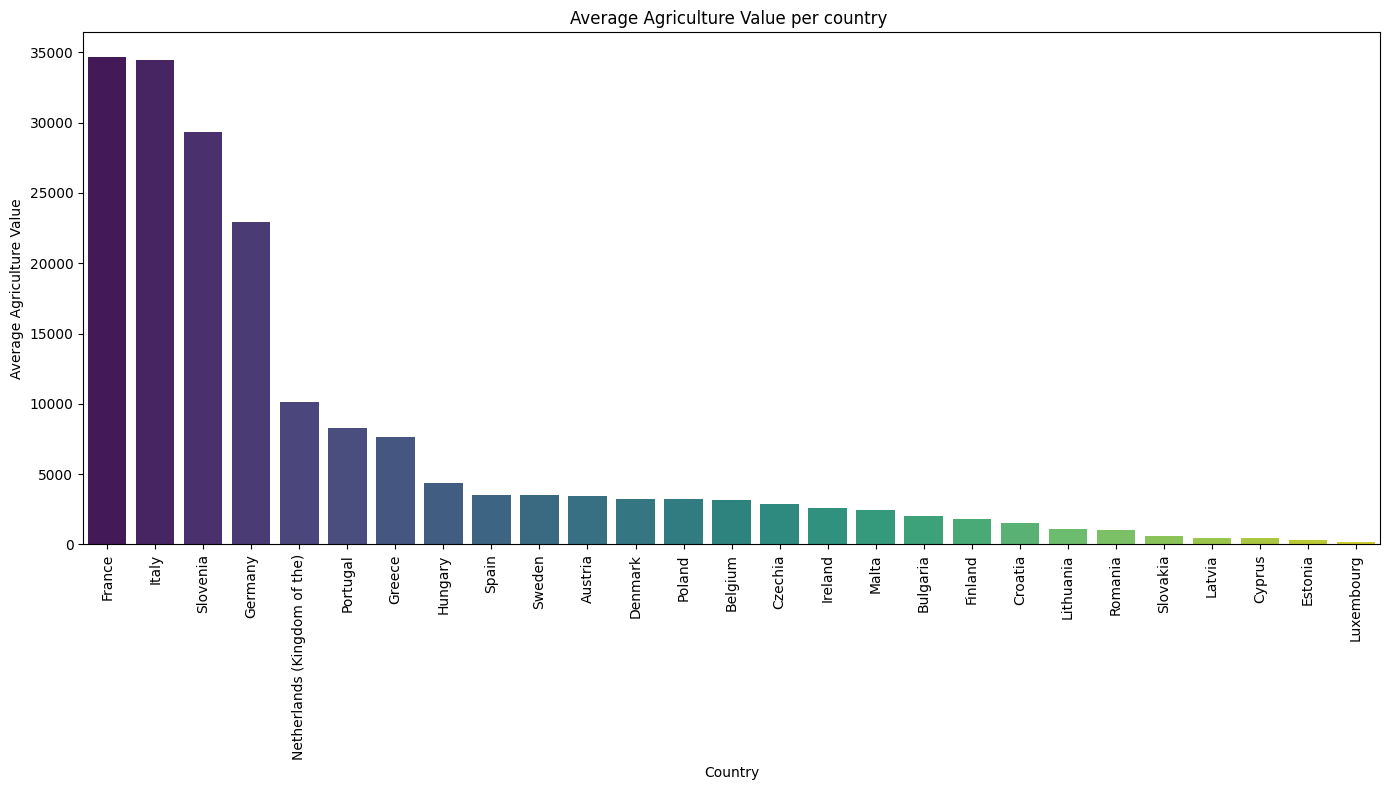

In [113]:
# Aggregate agriculture_value by year
ag_value_by_year = df.groupby("area")['agriculture_value'].mean().sort_values(ascending=False).reset_index()

# Plot
plt.figure(figsize=(14, 8))
sns.barplot(x='area', y='agriculture_value', data=ag_value_by_year, palette='viridis')
plt.title('Average Agriculture Value per country ')
plt.xlabel('Country')
plt.ylabel('Average Agriculture Value')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


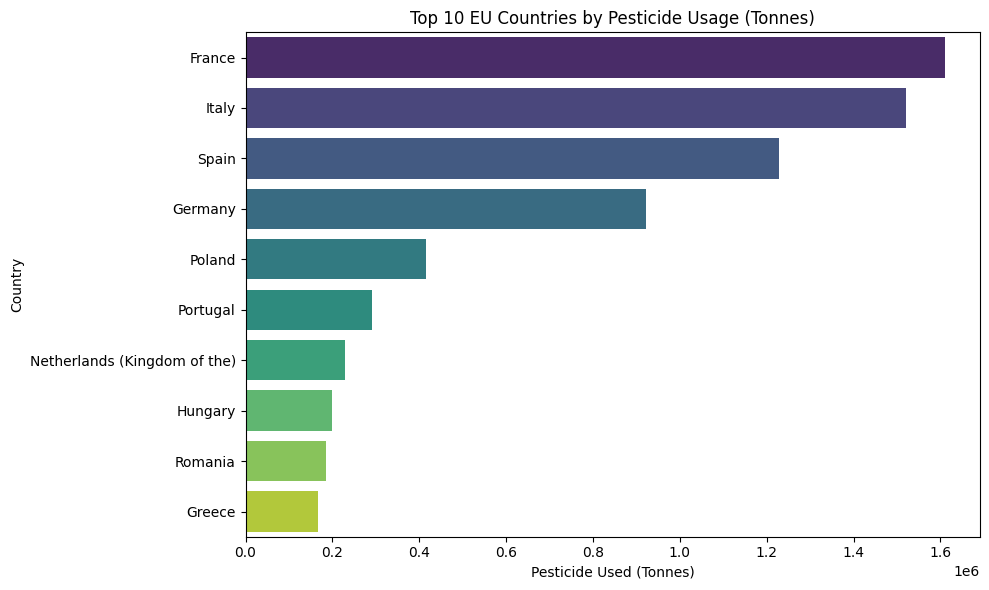

In [114]:
top_pesticide_countries = df.groupby("area")["pesticide_used_tonnes"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_pesticide_countries.values, y=top_pesticide_countries.index, palette="viridis")
plt.title("Top 10 EU Countries by Pesticide Usage (Tonnes)")
plt.xlabel("Pesticide Used (Tonnes)")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


## For this next grpah the data has to be scaled, as the data is not normally distributed, RobustScaler wll be used as 

In [115]:
# df_temp = df.groupby("year")["temp_change"].mean().reset_index()
# df_ag = df.groupby("year")['agriculture_value'].mean().reset_index()

# plt.figure(figsize=(12, 6))  # Adjusted figure size
# sns.lineplot(data=df_temp, x="year", y="temp_change", marker="o", color="red", label="Temperature Change")
# sns.lineplot(data=df_ag, x="year", y="agriculture_value", marker="o", color="blue", label="Agriculture Value")

# plt.title("Average Temperature Change and Agriculture Value in EU Over Time")
# plt.xlabel("Year")
# plt.xticks(rotation=70)
# plt.ylabel("Value")
# plt.legend()
# plt.grid()
# plt.tight_layout()
# plt.show()


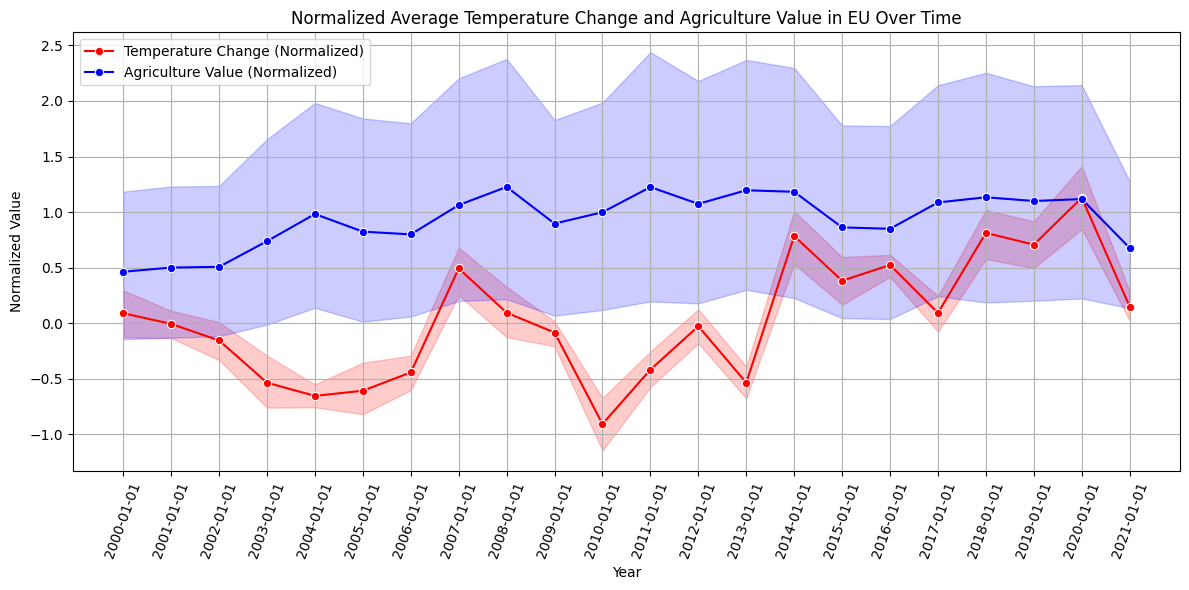

In [116]:
from sklearn.preprocessing import RobustScaler

# Normalize the temperature change and agriculture value
scaler = RobustScaler()
df['temp_change_scaled'] = scaler.fit_transform(df[['temp_change']])
df['agriculture_value_scaled'] = scaler.fit_transform(df[['agriculture_value']])

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="year", y="temp_change_scaled", marker="o", color="red", label="Temperature Change (Normalized)")
sns.lineplot(data=df, x="year", y="agriculture_value_scaled", marker="o", color="blue", label="Agriculture Value (Normalized)")

plt.title("Normalized Average Temperature Change and Agriculture Value in EU Over Time")
plt.xlabel("Year")
plt.xticks(rotation=70)
plt.ylabel("Normalized Value")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()



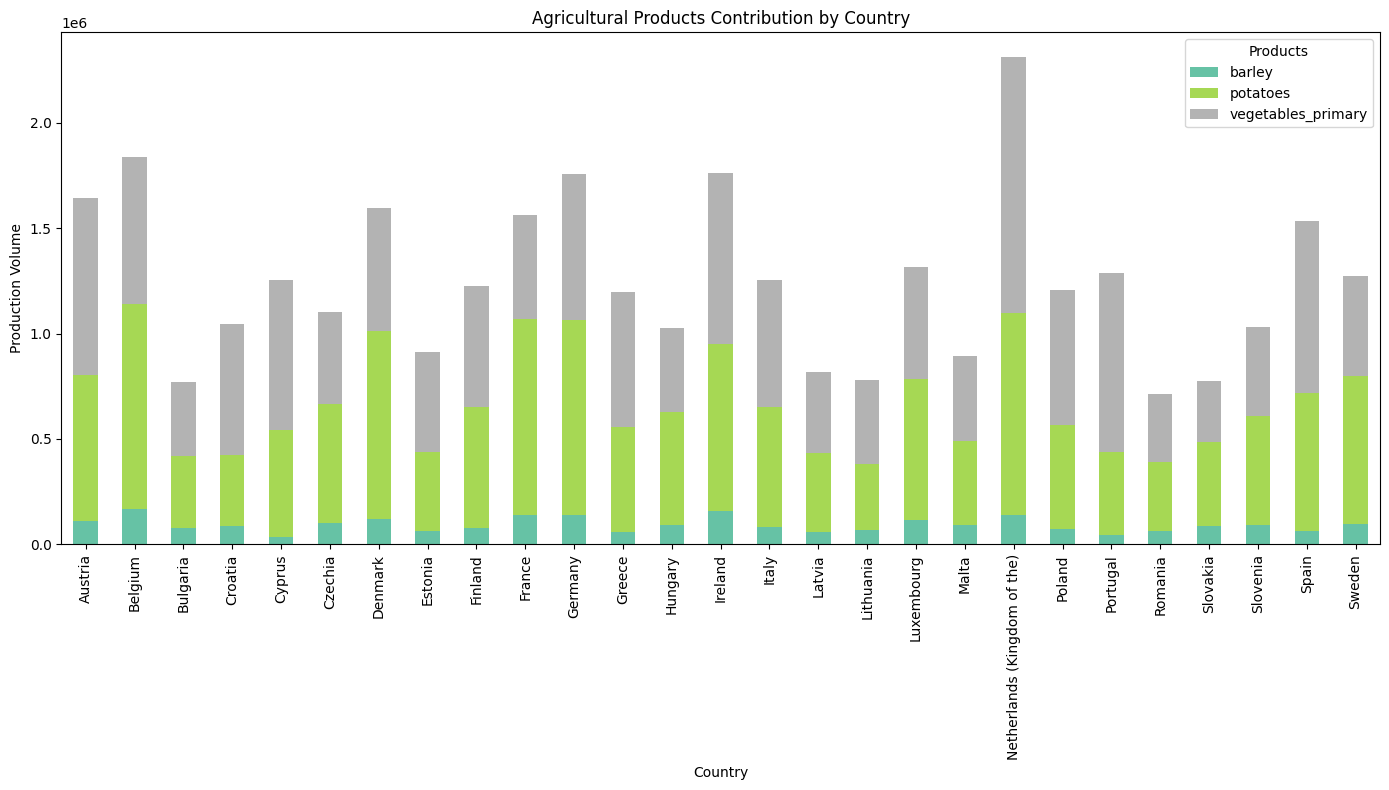

In [117]:
agriculture_columns = ["barley", "potatoes", "vegetables_primary"]
df_agriculture = df.groupby("area")[agriculture_columns].sum()

df_agriculture.plot(kind="bar", stacked=True, figsize=(14, 8), colormap="Set2")
plt.title("Agricultural Products Contribution by Country")
plt.xlabel("Country")
plt.ylabel("Production Volume")
plt.legend(title="Products")
plt.tight_layout()
plt.show()


In [118]:
# Aggregate the data by country
df_agg = df.groupby('country_code', as_index=False)['agriculture_value'].sum()

# Optionally, include the country name for hover info
df_agg = df_agg.merge(df[['country_code', 'area']].drop_duplicates(), on='country_code')

fig = px.choropleth(
    df_agg,
    locations="country_code",  # Use country codes for locations
    color="agriculture_value",  # Color by total agriculture value
    hover_name="area",  # Show country name on hover
    color_continuous_scale=px.colors.sequential.Plasma,  # Choose a color scale
    title="Total Agriculture Value (2000-2021) by EU Country"
)


# Set geographic scope to Europe and adjust the layout
fig.update_layout(
    geo=dict(
        scope='europe',  # Focus on Europe
        projection_scale=1.5,  # Zoom in 
        center={"lat": 55, "lon": 10},  # Center the map on Europe
    ),
    width=1000,  # Increase figure width
    height=800,  # Increase figure height
    title_font=dict(size=20),  # Adjust title font size
)
# Display the map
fig.show()


In [119]:
fig = px.choropleth(df,
                    locations = "country_code",
                    color = "agriculture_value",
                    animation_frame="year", 
                    hover_name = "area",color_continuous_scale=px.colors.sequential.Plasma
                    )
# Set geographic scope to Europe and adjust the layout
fig.update_layout(
    geo=dict(
        scope='europe',  # Focus on Europe
        projection_scale=1.5,  # Zoom in 
        center={"lat": 55, "lon": 10},  # Center the map on Europe
    ),
    width=1000,  # Increase figure width
    height=800,  # Increase figure height
    title_font=dict(size=20),  # Adjust title font size
)
fig.show()


In [120]:
fig = px.choropleth(df,
                    locations = "country_code",
                    color = "beef_and_buffalo_meat_primary",
                    animation_frame="year", 
                    hover_name = "area",color_continuous_scale=px.colors.sequential.Plasma
                    )
# Set geographic scope to Europe and adjust the layout
fig.update_layout(
    geo=dict(
        scope='europe',  # Focus on Europe
        projection_scale=1.5,  # Zoom in 
        center={"lat": 55, "lon": 10},  # Center the map on Europe
    ),
    width=1000,  # Increase figure width
    height=800,  # Increase figure height
    title_font=dict(size=20),  # Adjust title font size
)
fig.show()


In [121]:
fig = px.choropleth(df,
                    locations = "country_code",
                    color = "cereals_primary",
                    animation_frame="year", 
                    hover_name = "area",color_continuous_scale=px.colors.sequential.Plasma
                    )
# Set geographic scope to Europe and adjust the layout
fig.update_layout(
    geo=dict(
        scope='europe',  # Focus on Europe
        projection_scale=1.5,  # Zoom in 
        center={"lat": 55, "lon": 10},  # Center the map on Europe
    ),
    width=1000,  # Increase figure width
    height=800,  # Increase figure height
    title_font=dict(size=20),  # Adjust title font size
)
fig.show()

In [122]:
df.columns

Index(['area', 'year', 'barley', 'beef_and_buffalo_meat_primary',
       'cereals_primary', 'eggs_primary', 'fruit_primary', 'meat_poultry',
       'milk_total', 'potatoes', 'sheep_and_goat_meat', 'vegetables_primary',
       'wheat', 'temp_change', 'people_employed_000', 'pesticide_used_tonnes',
       'total_precipitation', 'total_population', 'agriculture_value',
       'country_code', 'temp_change_scaled', 'agriculture_value_scaled'],
      dtype='object')

In [123]:
fig = go.Figure(
    data=go.Choropleth(
        locations=df['country_code'], 
        z=df['total_precipitation'].astype(int), 
        locationmode='ISO-3', 
        colorscale='Greens',
        colorbar_title="Total Precipitation (mm)",
    )
)

# Set geographic scope to Europe and adjust the layout
fig.update_layout(
    geo=dict(
        scope='europe',  # Focus on Europe
        projection_scale=1.5,  # Zoom in 
        center={"lat": 55, "lon": 10},  # Center the map on Europe
    ),
    width=1000,  # Increase figure width
    height=800,  # Increase figure height
    title_font=dict(size=20),  # Adjust title font size
)
fig.show()

In [124]:
fig = px.scatter(
    df,
    x="total_population",
    y="people_employed_000",
    size="agriculture_value",
    color="area",
    hover_name="area",
    animation_frame="year",
    title="People employed vs Population (Size: Agriculture Value)",
    labels={"total_population": "Total Population", "pesticide_used_tonnes": "people employed"}
)
fig.show()

In [125]:
fig = px.choropleth(df,
                    locations = "country_code",
                    color = "cereals_primary",
                    animation_frame="year", 
                    hover_name = "area",color_continuous_scale=px.colors.sequential.Viridis
                    )
# Set geographic scope to Europe and adjust the layout
fig.update_layout(
    geo=dict(
        scope='europe',  # Focus on Europe
        projection_scale=1.5,  # Zoom in 
        center={"lat": 55, "lon": 10},  # Center the map on Europe
    ),
    width=1000,  # Increase figure width
    height=800,  # Increase figure height
    title_font=dict(size=20),  # Adjust title font size
)
fig.show()

In [126]:
df.columns

Index(['area', 'year', 'barley', 'beef_and_buffalo_meat_primary',
       'cereals_primary', 'eggs_primary', 'fruit_primary', 'meat_poultry',
       'milk_total', 'potatoes', 'sheep_and_goat_meat', 'vegetables_primary',
       'wheat', 'temp_change', 'people_employed_000', 'pesticide_used_tonnes',
       'total_precipitation', 'total_population', 'agriculture_value',
       'country_code', 'temp_change_scaled', 'agriculture_value_scaled'],
      dtype='object')

In [127]:
fig = px.scatter(
    df,
    x="total_population",
    y="people_employed_000",
    size="agriculture_value",
    color="area",
    hover_name="area",
    animation_frame="year",
    title="People employed vs Population (Size: Agriculture Value)",
    labels={"total_population": "Total Population", "pesticide_used_tonnes": "people employed"}
)
fig.show()

## Statistics tests 

In [128]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import shapiro, probplot,  kstest, norm ,binom,  chi2_contingency
import math

In [129]:
df.head()

,area,year,barley,beef_and_buffalo_meat_primary,cereals_primary,eggs_primary,fruit_primary,meat_poultry,milk_total,potatoes,...,wheat,temp_change,people_employed_000,pesticide_used_tonnes,total_precipitation,total_population,agriculture_value,country_code,temp_change_scaled,agriculture_value_scaled
0,Austria,2000-01-01,3819.5,3031.0,5403.9,165011.0,16294.6,17063.0,47916.0,29262.7,...,4468.8,1.774,766.87,3563.2,1271.30250,8010.428,2443.834497,AUT,0.458296,-0.139014
1,Austria,2001-01-01,4655.3,2993.0,5856.2,164992.0,15484.6,17531.0,49589.0,30039.4,...,5241.2,1.508,718.74,3132.2,1231.89840,8039.626,2527.762615,AUT,0.137910,-0.119343
2,Austria,2002-01-01,4286.6,2995.0,5831.0,164986.0,16201.2,17664.0,50362.0,30383.2,...,4966.7,1.542,703.31,3079.2,1339.83100,8078.992,2489.281305,AUT,0.178862,-0.128362
3,Austria,2003-01-01,4155.9,3033.0,5255.4,165013.0,16950.5,17718.0,51759.0,26528.7,...,4380.1,1.474,734.47,3384.9,964.65704,8120.104,2926.230271,AUT,0.096959,-0.025954
4,Austria,2004-01-01,5261.7,3058.0,6495.5,165005.0,17905.3,18297.0,54121.0,31611.7,...,5923.4,0.840,716.11,3301.7,1228.85990,8171.217,3375.140464,AUT,-0.666667,0.079257


In [130]:
df.describe()

,barley,beef_and_buffalo_meat_primary,cereals_primary,eggs_primary,fruit_primary,meat_poultry,milk_total,potatoes,sheep_and_goat_meat,vegetables_primary,wheat,temp_change,people_employed_000,pesticide_used_tonnes,total_precipitation,total_population,agriculture_value,temp_change_scaled,agriculture_value_scaled
count,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,5.940000e+02
mean,4235.207239,2582.988215,5015.181818,148127.942761,10984.303872,17045.094276,44339.332492,26430.732997,166.090909,26361.606902,4951.410943,1.426678,1157.720471,12919.918603,855.719822,16225.197855,7012.684884,0.039962,9.317891e-01
std,1666.399247,574.249195,1830.572171,41644.712880,7730.688824,2740.290419,26402.508119,10053.130596,45.784028,10195.856048,2069.799988,0.611957,1365.456347,21269.146643,220.021016,21203.054499,10409.748701,0.737075,2.439736e+00
min,114.000000,929.000000,176.300000,35189.000000,520.300000,10385.000000,1772.000000,5944.000000,78.000000,9398.100000,495.400000,-0.279000,10.240000,75.600000,211.824970,399.212000,114.196741,-2.014453,-6.850114e-01
25%,3043.850000,2250.250000,3607.450000,117285.500000,6414.675000,15367.750000,21655.000000,18170.400000,120.250000,18555.650000,3453.925000,1.021500,276.460000,1563.787500,723.089275,3385.797500,1243.858492,-0.448058,-4.202523e-01
50%,3992.800000,2654.500000,4858.350000,153589.500000,9529.700000,16707.500000,46374.500000,25022.050000,175.500000,25894.550000,4639.700000,1.393500,513.640000,3806.585000,823.040300,8377.014500,3036.971108,0.000000,5.334275e-17
75%,5402.825000,3029.000000,6212.525000,180616.750000,13671.625000,18295.250000,65252.250000,33271.600000,203.000000,31872.925000,6276.150000,1.851750,1271.455000,10255.255000,962.498525,16245.382000,5510.611138,0.551942,5.797477e-01
max,9145.700000,3695.000000,9842.200000,279087.000000,44196.200000,25718.000000,100966.000000,54000.300000,300.000000,58662.800000,10667.700000,3.598000,6246.270000,99694.000000,1763.293000,83408.554000,42678.495564,2.655224,9.290795e+00


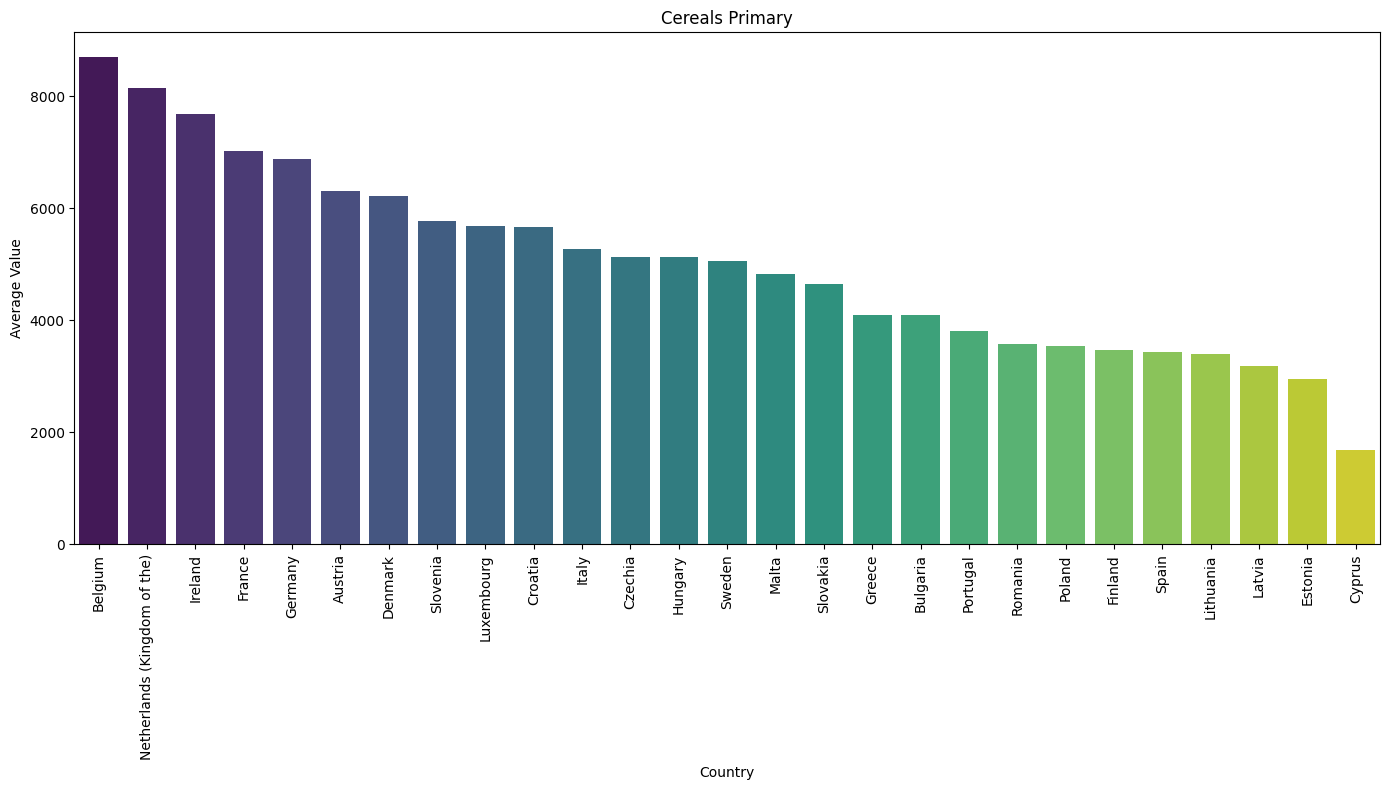

In [131]:
# Aggregate agriculture_value by year
cereal_value_by_year = df.groupby("area")['cereals_primary'].mean().sort_values(ascending=False).reset_index()

# Plot the graph for visualisation 
plt.figure(figsize=(14, 8))
sns.barplot(x='area', y='cereals_primary', data=cereal_value_by_year, palette='viridis')
plt.title('Cereals Primary')
plt.xlabel('Country')
plt.ylabel('Average Value')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# TEST 1 T test 

## Objective:
To determine if there is a statistically significant difference between the means of two groups, Ireland and Belgium, based on their cereals_primary values.

Null Hypothesis (H₀):
There is no significant difference between the means of the two groups:
H₀: μ₁ = μ₂, where:

μ₁ is the mean for Ireland (group1)
μ₂ is the mean for Belgium (group2)
Alternative Hypothesis (H₁):
There is a significant difference between the means of the two groups:
H₁: μ₁ ≠ μ₂
Significance Level (α): 0.05


A two-sample t-test compared the mean production levels between Belgium and Ireland. Assumptions for this test included data normality, independence, and equal variances. The null hypothesis stated no significant difference in production levels, while the alternative hypothesized a significant disparity.

In [160]:
# Filter agriculture_value for Ireland
group1 = df[df['country_code'] == 'IRL']['cereals_primary']

# Filter agriculture_value for Belgium
group2 = df[df['country_code'] == 'BEL']['cereals_primary']

 Step 1: Null and Alternative Hypothesis

- Null Hypothesis (H₀):  
The 2 Groups are normally distributed 

- Alternative Hypothesis (H₁):  
Either of the groups is not normally idstributed.  



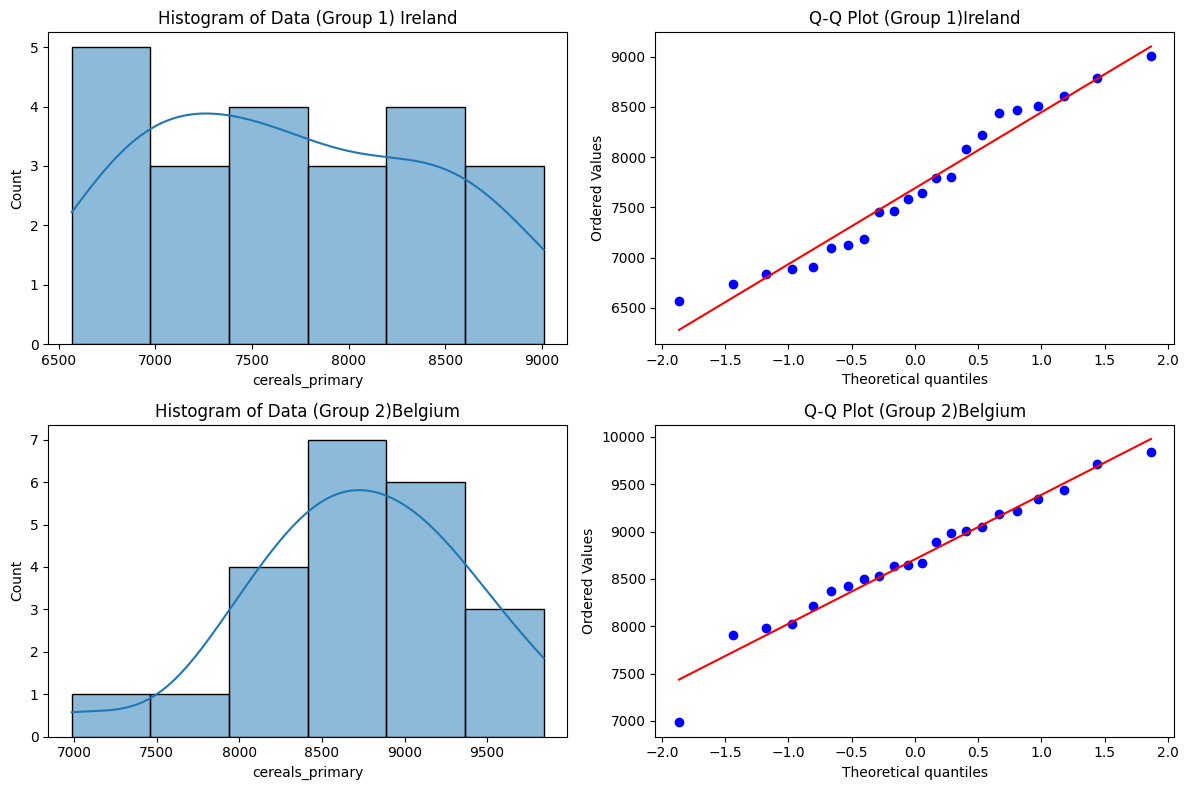

In [161]:
# 1. Visual Inspection with Histogram and Q-Q Plot
plt.figure(figsize=(12, 8))

# Histogram
plt.subplot(2, 2, 1)
sns.histplot(group1, kde=True)
plt.title("Histogram of Data (Group 1) Ireland")

# Q-Q Plot
plt.subplot(2, 2, 2)
probplot(group1, dist="norm", plot=plt)
plt.title("Q-Q Plot (Group 1)Ireland")

# Additional Hist and Q-Q for comparison
# Histogram
plt.subplot(2, 2, 3)
sns.histplot(group2, kde=True)
plt.title("Histogram of Data (Group 2)Belgium")

# Q-Q Plot
plt.subplot(2, 2, 4)
probplot(group2, dist="norm", plot=plt)
plt.title("Q-Q Plot (Group 2)Belgium")

plt.tight_layout()
plt.show()


In [162]:
# Step 3: Shapiro-Wilk Test
stat1, p1 = shapiro(group1)
stat2, p2 = shapiro(group2)
print("Shapiro-Wilk Test:")
print(f"Ireland: W-statistic={stat1}, p-value={p1}")
print(f"Belgium: W-statistic={stat2}, p-value={p2}")

# Step 4: Kolmogorov-Smirnov Test
stat1, p1 = kstest(group1, 'norm', args=(np.mean(group1), np.std(group1)))
stat2, p2 = kstest(group2, 'norm', args=(np.mean(group2), np.std(group2)))
print("\nKolmogorov-Smirnov Test:")
print(f"Ireland: D-statistic={stat1}, p-value={p1}")
print(f"Belgium: D-statistic={stat2}, p-value={p2}")


Shapiro-Wilk Test:
Ireland: W-statistic=0.9506502072225308, p-value=0.32534490691276446
Belgium: W-statistic=0.9723296581738297, p-value=0.7643507835353485

Kolmogorov-Smirnov Test:
Ireland: D-statistic=0.12550240410158797, p-value=0.8369904758986917
Belgium: D-statistic=0.07743208014377612, p-value=0.9979640020428482


- The p-value is greater than 0.05, so we fail to reject the null hypothesis. This supports the conclusion that "cereals_primary" for Ireland is approximately normally distributed.
- The p-value is greater than 0.05, so we fail to reject the null hypothesis. This supports the conclusion that "cereals_primary" for Belgium is approximately normally distributed.
- We fail to reject the null hyopthesis that the either of the distributions are not normally distributed 

Cereal production is a critical component of agricultural output and contributes significantly to the food security and economies of countries. This report compares cereal production between Belgium and Ireland, focusing on statistical differences in mean production values. Using data filtered from the cereals_primary metric, a two-sample t-test was conducted to determine whether the differences in cereal production between the two countries are statistically significant



We will conduct a {two-sample t-test} with a {significance level of 0.05} to check whether there is enough evidence to claim that the two groups have different means.

---

 Step 1: Null and Alternative Hypothesis

- Null Hypothesis (H₀):  
The mean of Group 1 is equal to the mean of Group 2.  
$$
H₀: \mu_1 = \mu_2
$$

- Alternative Hypothesis (H₁):  
The mean of Group 1 is not equal to the mean of Group 2.  
$$
H₁: \mu_1 \neq \mu_2
$$


In [163]:
# Step 1: Filter data for Ireland (group1) and Belgium (group2)
group1 = df[df['country_code'] == 'IRL']['cereals_primary'].dropna().values
group2 = df[df['country_code'] == 'BEL']['cereals_primary'].dropna().values

# Step 2: Calculate mean, standard deviation, and sample size for each group
mean_group1 = np.mean(group1)
mean_group2 = np.mean(group2)

std_group1 = np.std(group1, ddof=1)  # Sample standard deviation
std_group2 = np.std(group2, ddof=1)

n1 = len(group1)
n2 = len(group2)

# Step 3: Pooled t-test (equal variances assumed)
t_statistic = (mean_group1 - mean_group2) / np.sqrt(
    (std_group1**2 / n1) + (std_group2**2 / n2)
)

# Degrees of Freedom
dof = n1 + n2 - 2

# P-value for two-tailed test
p_value = 2 * (1 - stats.t.cdf(abs(t_statistic), dof))

# Step 4: Output the results
print(f"Group 1 (Ireland) Mean: {mean_group1}")
print(f"Group 2 (Belgium) Mean: {mean_group2}")
print(f"t-statistic: {t_statistic}")
print(f"Degrees of Freedom (df): {dof}")
print(f"p-value: {p_value}")

# Step 5: Decision rule
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: statistically Significant difference between the means.")
else:
    print("Fail to reject the null hypothesis: No statistically significant difference between the means.")

# Step 6: Validation using scipy's t-test
t_stat, p_val = stats.ttest_ind(group1, group2, equal_var=True)

print("\nUsing scipy's t-test (Equal Variances assumption):")
print(f"t-statistic: {t_stat}")
print(f"p-value: {p_val}")


Group 1 (Ireland) Mean: 7691.640909090909
Group 2 (Belgium) Mean: 8707.713636363636
t-statistic: -4.834613267153139
Degrees of Freedom (df): 42
p-value: 1.818017104082692e-05
Reject the null hypothesis: statistically Significant difference between the means.

Using scipy's t-test (Equal Variances assumption):
t-statistic: -4.834613267153139
p-value: 1.8180171040748742e-05


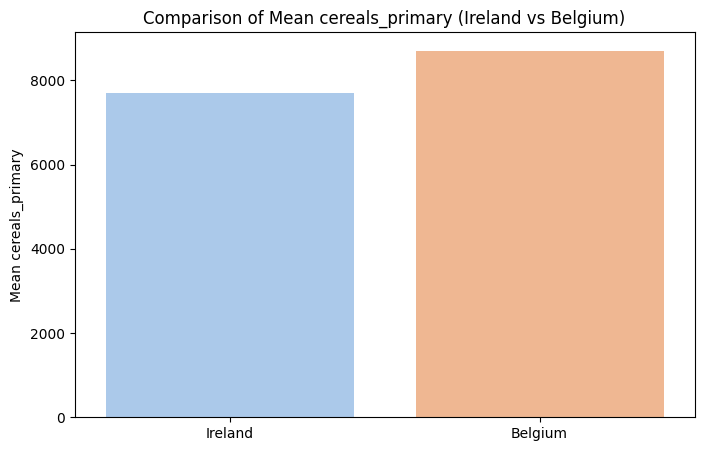

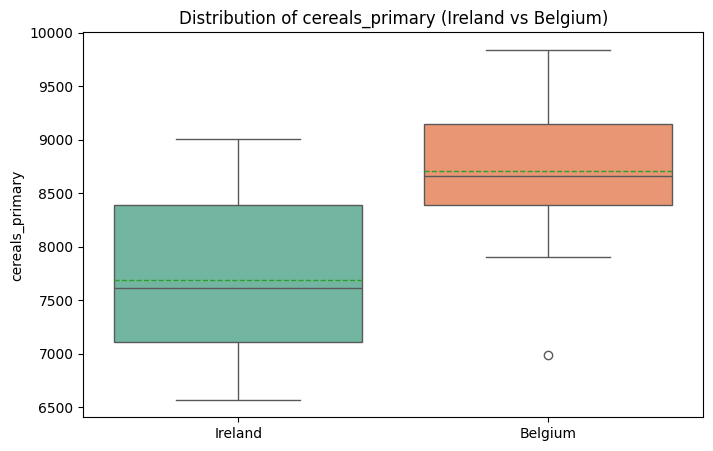

In [164]:
# Step 1: Bar Plot of Means
plt.figure(figsize=(8, 5))
means = [mean_group1, mean_group2]
labels = ["Ireland", "Belgium"]
metric= "cereals_primary"
sns.barplot(x=labels, y=means, palette="pastel")
plt.title(f"Comparison of Mean {metric} (Ireland vs Belgium)")
plt.ylabel(f"Mean {metric}")
plt.show()

# Step 2: Box Plot of Distributions
plt.figure(figsize=(8, 5))
sns.boxplot(
    data=[group1, group2],
    palette="Set2",
    showmeans=True,
    meanline=True,
)
plt.xticks([0, 1], ["Ireland", "Belgium"])
plt.title(f"Distribution of {metric} (Ireland vs Belgium)")
plt.ylabel(f"{metric}")
plt.show()


In [165]:
# Calculate  Cohen's d
cohen_d = (mean_group1 - mean_group2) / np.sqrt(((std_group1 ** 2 + std_group2 ** 2) / 2))
print(f"Cohen's d: {cohen_d}")


Cohen's d: -1.4576907466928377


In [166]:
# Given Cohen's d
effect_size = cohen_d  # From previous calculation of Cohen's d
alpha = 0.05  # Significance level
desired_power = 0.8  # Desired power

# Calculate z-scores
z_power = norm.ppf(desired_power)
z_alpha = norm.ppf(1 - alpha / 2)

# Required sample size formula for t-test:
# Required sample size for each group
n_required = ((z_power + z_alpha) ** 2) / effect_size**2

print(f"Required Sample Size per group: {n_required:.2f}")


Required Sample Size per group: 3.69


The required sample size of approximately 3.69 per group is quite small. While this may indicate a substantial effect size, small sample sizes often result in:

High variability in estimates.
Low statistical power, making it harder to detect true differences.
Increased risk of Type II errors (failing to detect true effects).
In practice, a sample size of less than 30 participants per group may not provide reliable and statistically significant results. Therefore, it is advisable to consider increasing the sample size to ensure more robust findings.

Given the high effect size (Cohen’s d = -1.46), a larger sample size is recommended to ensure reliable statistical results. Further adjustments, including increasing sample size or reconsidering the effect size, may yield more robust findings.

# Test 2 Z test

In [139]:
df.head()

,area,year,barley,beef_and_buffalo_meat_primary,cereals_primary,eggs_primary,fruit_primary,meat_poultry,milk_total,potatoes,...,wheat,temp_change,people_employed_000,pesticide_used_tonnes,total_precipitation,total_population,agriculture_value,country_code,temp_change_scaled,agriculture_value_scaled
0,Austria,2000-01-01,3819.5,3031.0,5403.9,165011.0,16294.6,17063.0,47916.0,29262.7,...,4468.8,1.774,766.87,3563.2,1271.30250,8010.428,2443.834497,AUT,0.458296,-0.139014
1,Austria,2001-01-01,4655.3,2993.0,5856.2,164992.0,15484.6,17531.0,49589.0,30039.4,...,5241.2,1.508,718.74,3132.2,1231.89840,8039.626,2527.762615,AUT,0.137910,-0.119343
2,Austria,2002-01-01,4286.6,2995.0,5831.0,164986.0,16201.2,17664.0,50362.0,30383.2,...,4966.7,1.542,703.31,3079.2,1339.83100,8078.992,2489.281305,AUT,0.178862,-0.128362
3,Austria,2003-01-01,4155.9,3033.0,5255.4,165013.0,16950.5,17718.0,51759.0,26528.7,...,4380.1,1.474,734.47,3384.9,964.65704,8120.104,2926.230271,AUT,0.096959,-0.025954
4,Austria,2004-01-01,5261.7,3058.0,6495.5,165005.0,17905.3,18297.0,54121.0,31611.7,...,5923.4,0.840,716.11,3301.7,1228.85990,8171.217,3375.140464,AUT,-0.666667,0.079257


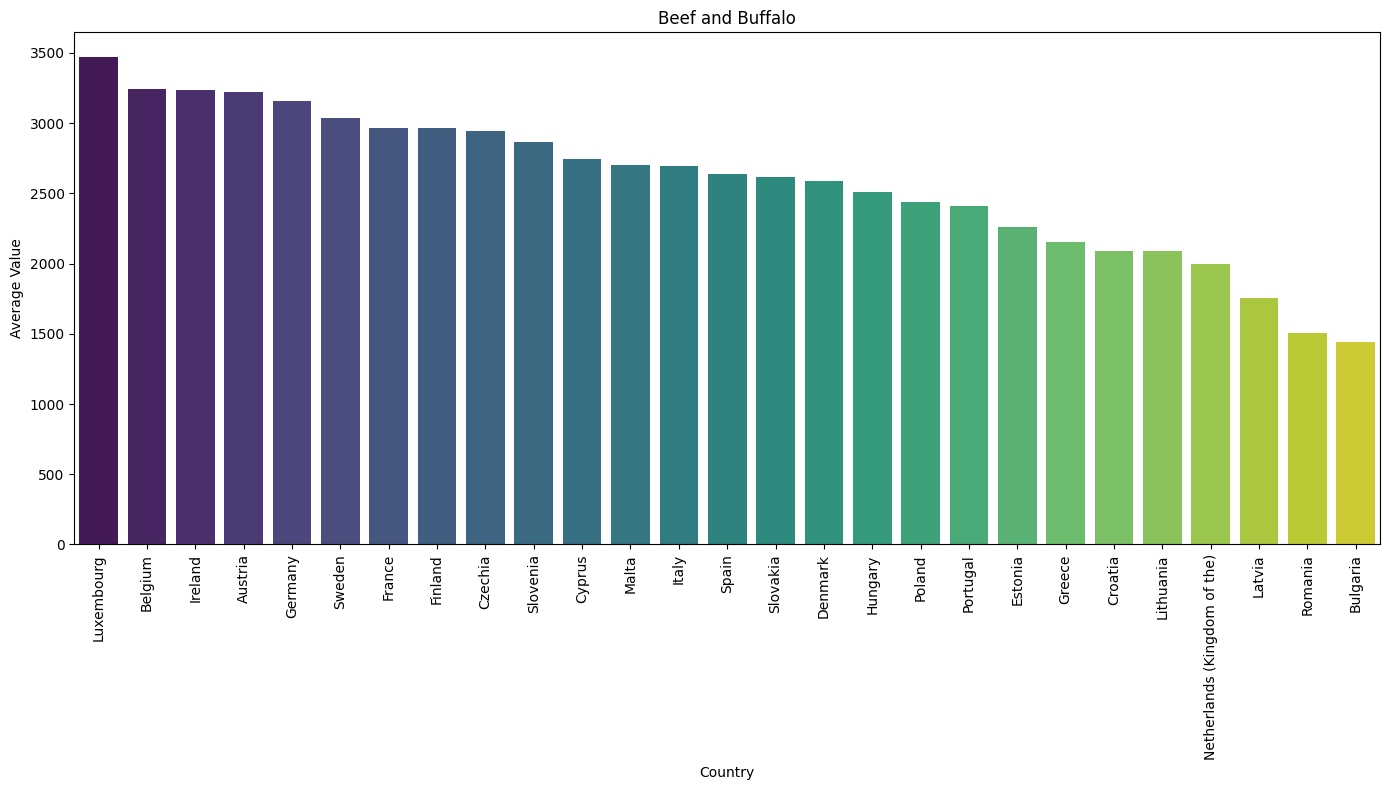

In [140]:
# Aggregate agriculture_value by year
beef_value_by_year = df.groupby("area")['beef_and_buffalo_meat_primary'].mean().sort_values(ascending=False).reset_index()

# Plot
plt.figure(figsize=(14, 8))
sns.barplot(x='area', y='beef_and_buffalo_meat_primary', data=beef_value_by_year, palette='viridis')
plt.title('Beef and Buffalo')
plt.xlabel('Country')
plt.ylabel('Average Value')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [141]:
# Filter agriculture_value for Ireland
group1_z = df['beef_and_buffalo_meat_primary'].sample(40,random_state=42)

# # Filter agriculture_value for all other EU countries
# group2_z = df[df['country_code'] != 'IRL']['beef_and_buffalo_meat_primary'].sample(12,random_state=42)
print(len(group1_z))
# print(len(group2_z))

40


 Step 1: Null and Alternative Hypothesis

- Null Hypothesis (H₀):  
The 2 Groups are normally distributed 

- Alternative Hypothesis (H₁):  
Either of the groups is not normally distributed.  


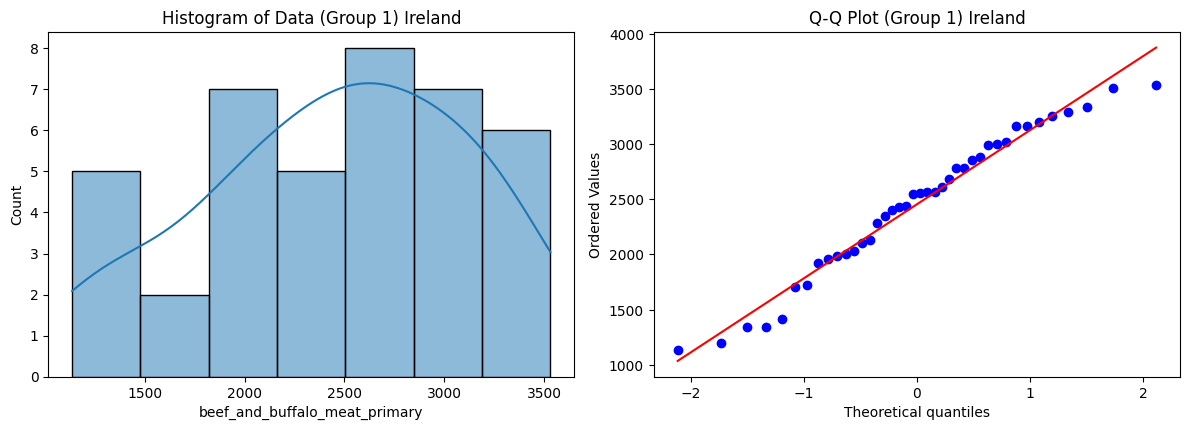

In [142]:
# 1. Visual Inspection with Histogram and Q-Q Plot
plt.figure(figsize=(12, 8))

# Histogram
plt.subplot(2, 2, 1)
sns.histplot(group1_z, kde=True)
plt.title("Histogram of Data (Group 1) Ireland")

# Q-Q Plot
plt.subplot(2, 2, 2)
probplot(group1_z, dist="norm", plot=plt)
plt.title("Q-Q Plot (Group 1) Ireland")

plt.tight_layout()
plt.show()


In [143]:
# Step 3: Shapiro-Wilk Test
stat1, p1 = shapiro(group1_z)
print("Shapiro-Wilk Test:")
print(f"beef_and_buffalo_meat_primary: W-statistic={stat1}, p-value={p1}")

# Step 4: Kolmogorov-Smirnov Test
stat1, p1 = kstest(group1_z, 'norm', args=(np.mean(group1_z), np.std(group1_z)))
print("\nKolmogorov-Smirnov Test:")
print(f"beef_and_buffalo_meat_primary: D-statistic={stat1}, p-value={p1}")


Shapiro-Wilk Test:
beef_and_buffalo_meat_primary: W-statistic=0.9648823930103925, p-value=0.24504989186731407

Kolmogorov-Smirnov Test:
beef_and_buffalo_meat_primary: D-statistic=0.08422405672125022, p-value=0.91643721385575


1. Shapiro-Wilk Test
Null Hypothesis (
𝐻
0
H 
0
​
 ): The data follows a normal distribution.
Alternative Hypothesis (
𝐻
𝑎
H 
a
​
 ): The data does not follow a normal distribution.
Test Results:

W-statistic = 0.9649
p-value = 0.2450
Decision: Since the p-value (0.2450>0.050.2450>0.05) is greater than the significance level (𝛼=0.05α=0.05), we fail to reject 𝐻0H 0
​
 .

Conclusion: The data for beef_and_buffalo_meat_primary is consistent with a normal distribution based on the Shapiro-Wilk test.

2. Kolmogorov-Smirnov Test
Null Hypothesis (
𝐻
0
H 
0
​
 ): The data follows a normal distribution.
Alternative Hypothesis (
𝐻
𝑎
H 
a
​
 ): The data does not follow a normal distribution.
Test Results:

D-statistic = 0.0842
p-value = 0.9164
Decision: Since the p-value (
0.9164
>
0.05
0.9164>0.05) is greater than the significance level (
𝛼
=
0.05
α=0.05), we fail to reject 
𝐻
0
H 
0
​
 .

Conclusion: The data for beef_and_buffalo_meat_primary is consistent with a normal distribution based on the Kolmogorov-Smirnov test.

# Both Shapiro-Wilk and Kolmogorov-Smirnov tests indicate that the distributions are likely normal, with high p-values suggesting no significant deviation from normality

In [144]:
# Metric to analyze
metric = 'beef_and_buffalo_meat_primary'

# Compute population parameters (all 27 EU countries)
population_mean = df[metric].mean()  # Scalar value
population_std = df[metric].std()    # Scalar value

# Using your groups
sample_data_group1 = group1_z  # Ireland's sample

# Compute sample statistics
sample_mean_group1 = sample_data_group1.mean()
sample_size_group1 = sample_data_group1.count()



# # Print sample statistics for both groups
# print(f"Group 1 (Ireland) Sample Data:\n{sample_data_group1}")
# print(f"Group 1 Sample Mean: {sample_mean_group1}")
# print(f"Group 1 Sample Size: {sample_size_group1}")


# Significance level
alpha = 0.05

# Z-score for Group 1 
z_score_group1 = (sample_mean_group1 - population_mean) / (population_std / math.sqrt(sample_size_group1))
print(f"Group 1 Z-score: {z_score_group1}")

# Compute p-value for a two-tailed test for Group 1
p_value_group1 = 2 * (1 - norm.cdf(abs(z_score_group1)))
print(f"Group 1 P-value: {p_value_group1}")

# Decision for Group 1
if p_value_group1 < alpha:
    print("Group 1: Reject the null hypothesis: The sample mean is significantly different from the population mean.")
else:
    print("Group 1: Fail to reject the null hypothesis: The sample mean is not significantly different from the population mean.")



Group 1 Z-score: -1.4085106269589593
Group 1 P-value: 0.15897992245290382
Group 1: Fail to reject the null hypothesis: The sample mean is not significantly different from the population mean.


In [145]:
# Sample mean for Ireland
sample_mean_group1 = group1_z.mean()
# Population mean
population_mean = df[metric].mean()
# Population standard deviation
population_std = df[metric].std()

# Cohen's d calculation
cohen_d = (sample_mean_group1 - population_mean) / math.sqrt((population_std**2 + population_std**2) / 2)
print(f'Cohen\'s d: {cohen_d}')

# Given significance level and desired power
alpha = 0.05
desired_power = 0.8

# Z-value for the desired power
z_power = norm.ppf(desired_power)

# Z-value for alpha
z_alpha = norm.ppf(1 - alpha / 2)

# Calculating the required sample size
required_sample_size = (2 * (z_power + z_alpha) ** 2) / cohen_d**2

print(f'Required Sample Size: {required_sample_size}')


Cohen's d: -0.22270508448710372
Required Sample Size: 316.5026900508698


# in future studies it would be wise to redo the Z test with appropriate sample size 

# Test 3 Binomial 

In [146]:
df.head()

,area,year,barley,beef_and_buffalo_meat_primary,cereals_primary,eggs_primary,fruit_primary,meat_poultry,milk_total,potatoes,...,wheat,temp_change,people_employed_000,pesticide_used_tonnes,total_precipitation,total_population,agriculture_value,country_code,temp_change_scaled,agriculture_value_scaled
0,Austria,2000-01-01,3819.5,3031.0,5403.9,165011.0,16294.6,17063.0,47916.0,29262.7,...,4468.8,1.774,766.87,3563.2,1271.30250,8010.428,2443.834497,AUT,0.458296,-0.139014
1,Austria,2001-01-01,4655.3,2993.0,5856.2,164992.0,15484.6,17531.0,49589.0,30039.4,...,5241.2,1.508,718.74,3132.2,1231.89840,8039.626,2527.762615,AUT,0.137910,-0.119343
2,Austria,2002-01-01,4286.6,2995.0,5831.0,164986.0,16201.2,17664.0,50362.0,30383.2,...,4966.7,1.542,703.31,3079.2,1339.83100,8078.992,2489.281305,AUT,0.178862,-0.128362
3,Austria,2003-01-01,4155.9,3033.0,5255.4,165013.0,16950.5,17718.0,51759.0,26528.7,...,4380.1,1.474,734.47,3384.9,964.65704,8120.104,2926.230271,AUT,0.096959,-0.025954
4,Austria,2004-01-01,5261.7,3058.0,6495.5,165005.0,17905.3,18297.0,54121.0,31611.7,...,5923.4,0.840,716.11,3301.7,1228.85990,8171.217,3375.140464,AUT,-0.666667,0.079257


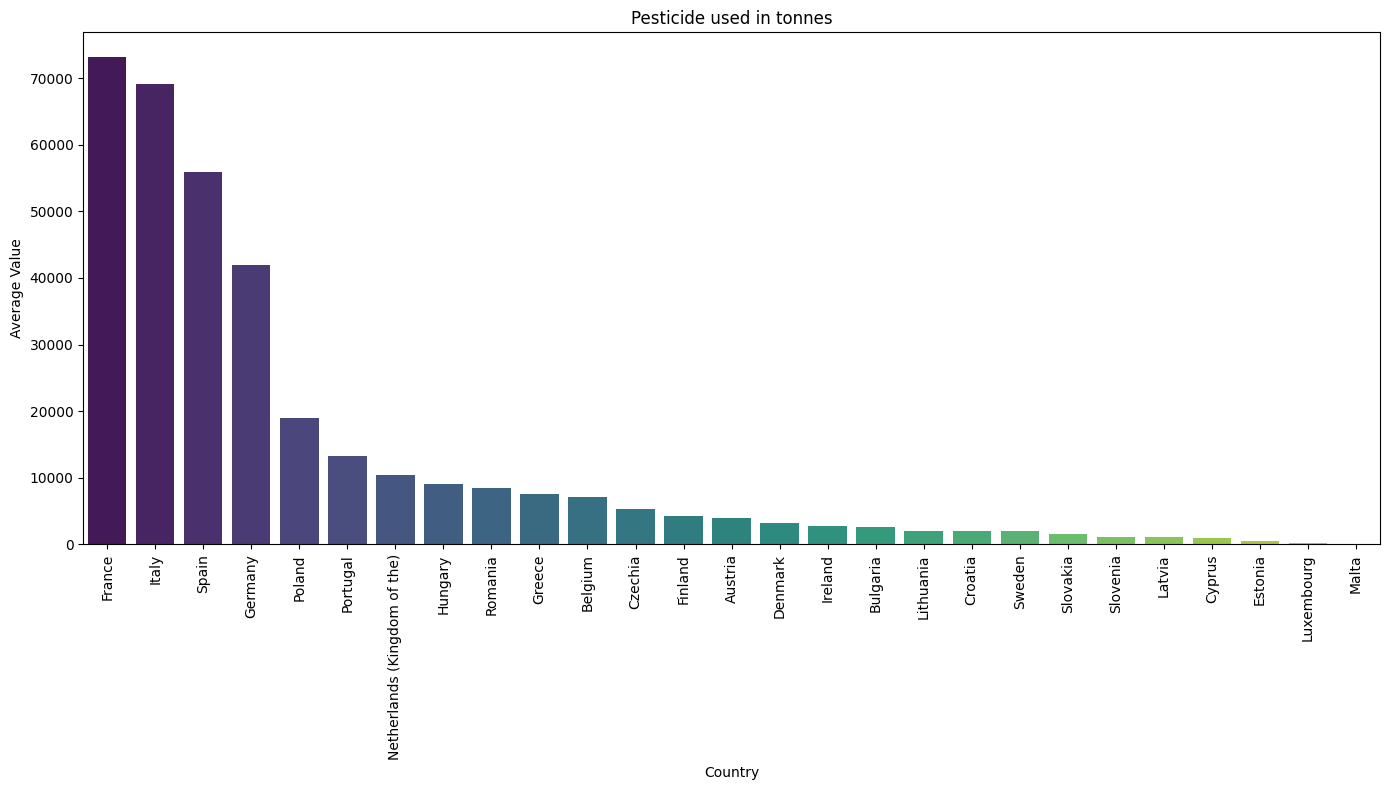

In [147]:
# Aggregate pesticide_used_tonnes by year
pest_value_by_year = df.groupby("area")['pesticide_used_tonnes'].mean().sort_values(ascending = False).reset_index()

# Plot
plt.figure(figsize=(14, 8))
sns.barplot(x='area', y='pesticide_used_tonnes', data=pest_value_by_year, palette='viridis')
plt.title('Pesticide used in tonnes')
plt.xlabel('Country')
plt.ylabel('Average Value')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [148]:
# Calculate the mean of mean_pesticide
mean_pesticide = df['pesticide_used_tonnes'].mean()
print(mean_pesticide)
# Create a new column 'Successes' where mean_pesticide > mean
df['Success'] = df['pesticide_used_tonnes'].apply(lambda x: 1 if x > mean_pesticide else 0)

12919.918602693602


In [149]:

# Example: Testing proportion of pesticide_used_tonnes > 5000
successes = len(df[df['Success'] > mean_pesticide])
total = len(df)
n = total  # Number of trials
k = successes  # Number of successes
p = 0.5  # Null hypothesis proportion

# Using binom test
p_value = binom.sf(k-1, n, p)  # 1 - cumulative distribution function for the binomial
print(p_value)


# Calculate number of trials and successes
n = len(df)  # Total number of entries
k = df['Success'].sum()  # Total successes

# Calculate probability of success
p = k / n  # Probability of success

# Calculate probabilities using binomial distribution
probabilities = [binom.pmf(k, n, p) for k in range(n+1)]  # Probability for k successes

# Display results
print(f"Probability of success (p): {p}")
print(f"Total successes (k): {k}")
print(f"Total trials (n): {n}")
print("Probabilities of k successes:", probabilities)

1.0
Probability of success (p): 0.20033670033670034
Total successes (k): 119
Total trials (n): 594
Probabilities of k successes: [2.122539584181352e-58, 3.1586070115251434e-56, 2.3462465366557136e-54, 1.1599184281706606e-52, 4.2934685860429236e-51, 1.2692397028466559e-49, 3.121483509200787e-48, 6.56891561220473e-47, 1.2075222691034555e-45, 1.969715974588565e-44, 2.886774264652266e-43, 3.839603144426405e-42, 4.673335918436151e-41, 5.241553020875446e-40, 5.4495599144406226e-39, 5.278998249750219e-38, 4.7858981369215576e-37, 4.0765776551546265e-36, 3.273801772349478e-35, 2.486420705639034e-34, 1.790877229298437e-33, 1.2263424563855386e-32, 8.001972542924379e-32, 4.985613428391617e-31, 2.971644270577008e-30, 1.6974032073536244e-29, 9.30630514762104e-29, 4.904731208873293e-28, 2.488247585385722e-27, 1.216649204109441e-26, 5.740449771108608e-26, 2.616475564263011e-25, 1.1532632459139793e-24, 4.920442702407293e-24, 2.033955630774096e-23, 8.152950570513394e-23, 3.1715931280767295e-22, 1.198293

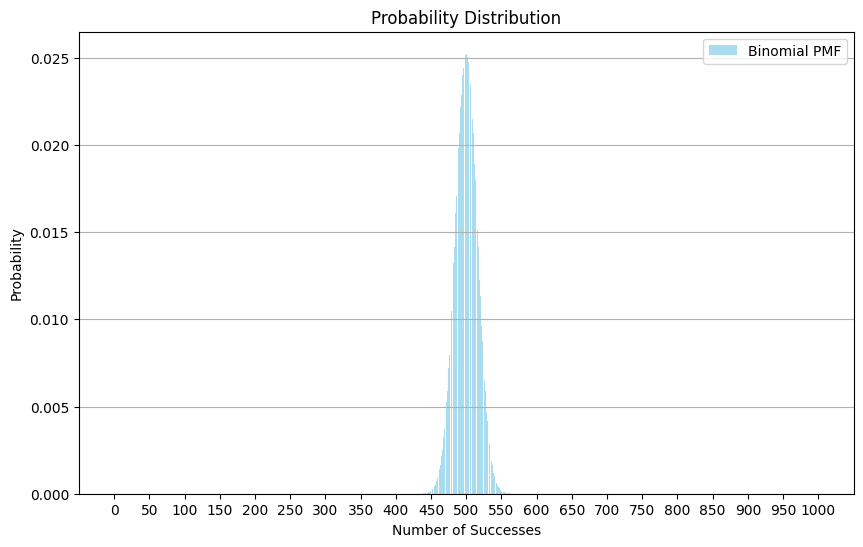

In [150]:
# Parameters
n = 1000  # Number of trials
p = 0.5   # Probability of success
x = np.arange(0, n + 1)  # Number of possible successes 

# Binomial distribution
binom_pmf = binom.pmf(x, n, p)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(x, binom_pmf, color='skyblue', alpha=0.7, label='Binomial PMF')
plt.title('Probability Distribution')
plt.xlabel('Number of Successes')
plt.ylabel('Probability')
plt.xticks(x[::50])  # Adjust x-ticks to avoid overlap
plt.legend()
plt.grid(axis='y')
plt.show()


# Test 4 Anova

# One-Way ANOVA Test Explanation

One-Way **Analysis of Variance (ANOVA)** is a statistical method used to test whether there is a significant difference between the means of three or more independent groups.

### Hypotheses for One-Way ANOVA:

- **Null Hypothesis (\(H_0\))**: All group means are equal. In other words:
  $$
  H_0: \mu_1 = \mu_2 = \dots = \mu_k
  $$
  where \(k\) is the number of groups, and \(\mu_1, \mu_2, \dots, \mu_k\) are the population means of the groups.

- **Alternative Hypothesis (\(H_1\))**: At least one group mean is different. This can be represented as:
  $$
  H_1: \text{At least one } \mu_i \neq \mu_j
  $$

Where \(i\) and \(j\) represent different group indices.

In [170]:
df.head()

,area,year,barley,beef_and_buffalo_meat_primary,cereals_primary,eggs_primary,fruit_primary,meat_poultry,milk_total,potatoes,...,people_employed_000,pesticide_used_tonnes,total_precipitation,total_population,agriculture_value,country_code,temp_change_scaled,agriculture_value_scaled,Success,temp_category
0,Austria,2000-01-01,3819.5,3031.0,5403.9,165011.0,16294.6,17063.0,47916.0,29262.7,...,766.87,3563.2,1271.30250,8010.428,2443.834497,AUT,0.458296,-0.139014,0,High
1,Austria,2001-01-01,4655.3,2993.0,5856.2,164992.0,15484.6,17531.0,49589.0,30039.4,...,718.74,3132.2,1231.89840,8039.626,2527.762615,AUT,0.137910,-0.119343,0,High
2,Austria,2002-01-01,4286.6,2995.0,5831.0,164986.0,16201.2,17664.0,50362.0,30383.2,...,703.31,3079.2,1339.83100,8078.992,2489.281305,AUT,0.178862,-0.128362,0,High
3,Austria,2003-01-01,4155.9,3033.0,5255.4,165013.0,16950.5,17718.0,51759.0,26528.7,...,734.47,3384.9,964.65704,8120.104,2926.230271,AUT,0.096959,-0.025954,0,High
4,Austria,2004-01-01,5261.7,3058.0,6495.5,165005.0,17905.3,18297.0,54121.0,31611.7,...,716.11,3301.7,1228.85990,8171.217,3375.140464,AUT,-0.666667,0.079257,0,Low


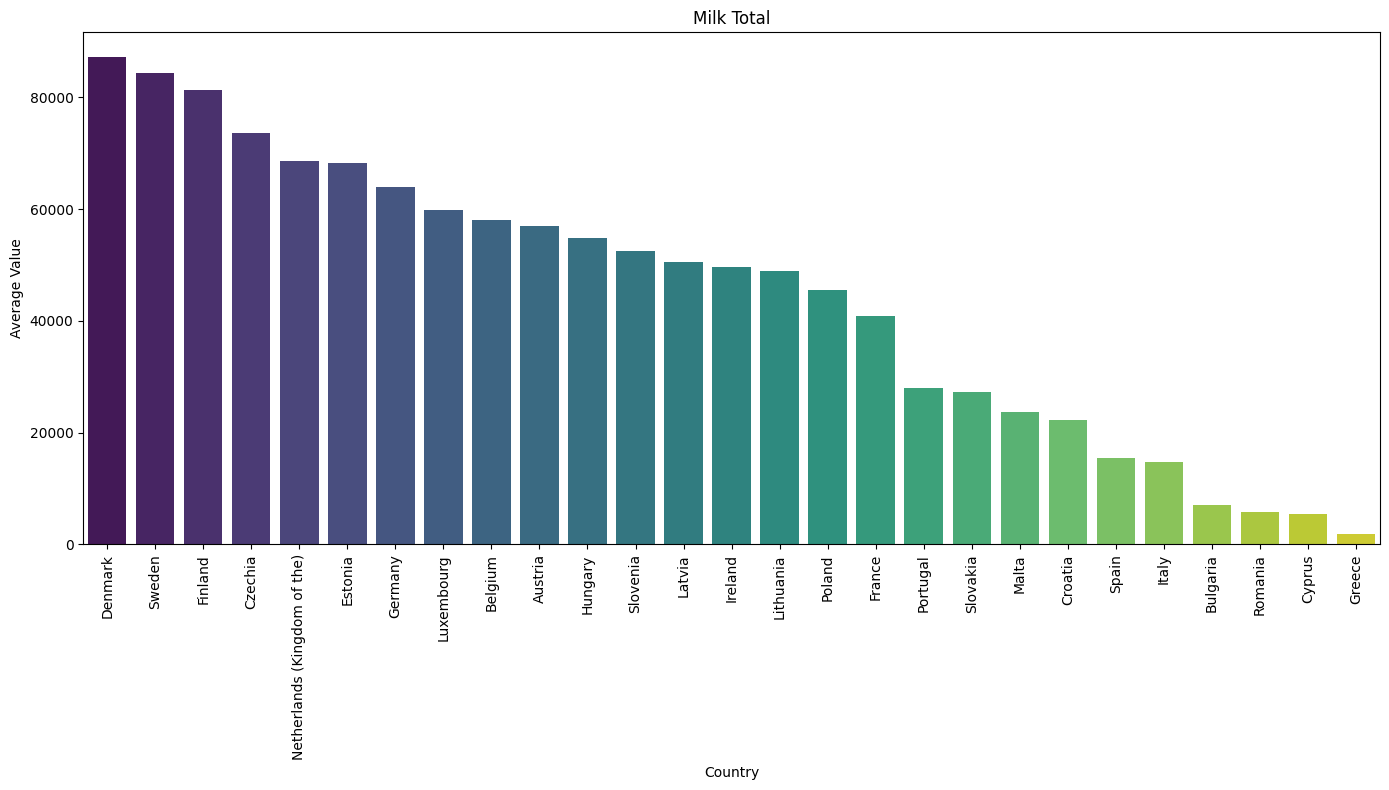

In [171]:
# Aggregate agriculture_value by year
milk_value_by_year = df.groupby("area")['milk_total'].mean().sort_values(ascending=False).reset_index()

# Plot
plt.figure(figsize=(14, 8))
sns.barplot(x='area', y='milk_total', data=milk_value_by_year, palette='viridis')
plt.title('Milk Total')
plt.xlabel('Country')
plt.ylabel('Average Value')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [172]:
milk_value_by_year

,area,milk_total
0,Denmark,87294.318182
1,Sweden,84315.090909
2,Finland,81317.363636
3,Czechia,73670.954545
4,Netherlands (Kingdom of the),68590.863636
5,Estonia,68319.363636
6,Germany,63919.772727
7,Luxembourg,59848.590909
8,Belgium,58079.000000
9,Austria,56970.636364


-The choice of Ireland, Czechia, and Denmark for the ANOVA analysis on milk_total was guided by several factors:

1. Diverse Milk Production Values:
Ireland had a relatively lower milk production value (49685.09), reflecting a smaller output compared to other EU countries.
Czechia had a moderate milk production value (73670.95), providing a balanced midpoint.
Denmark showed a significantly higher milk production value (87294.32), indicating a much larger output.
This diversity allows for a comprehensive understanding of how milk production varies among countries with different production scales, contributing to a more meaningful analysis.

2. Distinct Levels of Production:
Ireland, with its lower production, serves as a baseline or starting point.
Czechia offers an intermediate level of production, making it a suitable comparison point.
Denmark, with its high production levels, represents the upper end of the spectrum.

While Ireland, Czechia, and Denmark have distinct levels of milk production, the ANOVA will assess whether these differences are statistically significant relative to the assumptions and conditions required. The results should be interpreted carefully, considering the assumptions, sample size, and the use of post-hoc tests if needed.

In [173]:
# Unique country codes
#print(df['country_code'].unique())

# Check milk_total data for selected countries
group_A = df[df['country_code'] == "IRL"]['milk_total'].values
group_B = df[df['country_code'] == "CZE"]['milk_total'].values
group_C = df[df['country_code'] == "DNK"]['milk_total'].values

print(group_A, group_B, group_C)


[43820. 45512. 46113. 45951. 45566. 47969. 48164. 47942. 46475. 47673.
 49748. 49572. 47228. 48003. 47425. 50819. 49012. 52197. 57200. 57828.
 58799. 60056.] [53817. 57401. 58723. 59116. 61684. 64225. 65425. 76455. 69592. 70553.
 70902. 73202. 76333. 76444. 79128. 82173. 82790. 84445. 88163. 87314.
 91530. 91346.] [ 74211.  73040.  73089.  76264.  77572.  81238.  84085.  85255.  84591.
  85487.  86402.  86364.  85067.  87659.  92265.  95477.  95426.  97488.
  98512.  99734. 100283. 100966.]


In [174]:
# Perform One-Way ANOVA
f_stat, p_value = stats.f_oneway(group_A, group_B, group_C)  # Add all groups

# Set significance level (alpha)
alpha = 0.05

# Compare p-value with significance level to make a decision
if p_value <= alpha:
    result = f"Reject the null hypothesis: There is a statistically significant difference between the means of the groups.\nF-statistic: {f_stat}\np-value: {p_value}"
else:
    result = f"Fail to reject the null hypothesis: There is no statistically significant difference between the means of the groups.\nF-statistic: {f_stat}\np-value: {p_value}"

# Display the result
print(result)


Reject the null hypothesis: There is a statistically significant difference between the means of the groups.
F-statistic: 100.64402250343548
p-value: 2.4198334648837996e-20


# Test 5 Chi squared

In [156]:
df.head()

,area,year,barley,beef_and_buffalo_meat_primary,cereals_primary,eggs_primary,fruit_primary,meat_poultry,milk_total,potatoes,...,temp_change,people_employed_000,pesticide_used_tonnes,total_precipitation,total_population,agriculture_value,country_code,temp_change_scaled,agriculture_value_scaled,Success
0,Austria,2000-01-01,3819.5,3031.0,5403.9,165011.0,16294.6,17063.0,47916.0,29262.7,...,1.774,766.87,3563.2,1271.30250,8010.428,2443.834497,AUT,0.458296,-0.139014,0
1,Austria,2001-01-01,4655.3,2993.0,5856.2,164992.0,15484.6,17531.0,49589.0,30039.4,...,1.508,718.74,3132.2,1231.89840,8039.626,2527.762615,AUT,0.137910,-0.119343,0
2,Austria,2002-01-01,4286.6,2995.0,5831.0,164986.0,16201.2,17664.0,50362.0,30383.2,...,1.542,703.31,3079.2,1339.83100,8078.992,2489.281305,AUT,0.178862,-0.128362,0
3,Austria,2003-01-01,4155.9,3033.0,5255.4,165013.0,16950.5,17718.0,51759.0,26528.7,...,1.474,734.47,3384.9,964.65704,8120.104,2926.230271,AUT,0.096959,-0.025954,0
4,Austria,2004-01-01,5261.7,3058.0,6495.5,165005.0,17905.3,18297.0,54121.0,31611.7,...,0.840,716.11,3301.7,1228.85990,8171.217,3375.140464,AUT,-0.666667,0.079257,0


In [175]:
# Feature engineering apprpopriate columns 
# Create a binary column for temperature change
median_temp = df['temp_change'].median()
df['temp_category'] = ['Low' if x <= median_temp else 'High' for x in df['temp_change']]

# Contingency table: Counts of temp_category (Low/High) for each country
contingency_table = pd.crosstab(df['area'], df['temp_category'])

# Print the contingency table
print("Contingency Table:")
print(type(contingency_table))

# # Perform Chi-Squared Test
# chi2, p, dof, expected = chi2_contingency(contingency_table)

# # Results
# print(f"Chi-Squared Statistic: {chi2}")
# print(f"P-Value: {p}")
# print(f"Degrees of Freedom: {dof}")
# print("Expected Frequencies:")
# print(type(expected))
# expected_df = pd.DataFrame(expected)

# # Conclusion
# alpha = 0.05
# if p < alpha:
#     print("There is a statistically significant association between area and temperature categories.")
# else:
#     print("There is no statistically significant association between area and temperature categories.")


Contingency Table:
<class 'pandas.core.frame.DataFrame'>


In [176]:
from scipy.stats import chi2, chi2_contingency

# Calculate the Chi-Square statistic manually
chi2_stat_manual = np.sum((contingency_table.values - expected_df.values) ** 2 / expected_df.values)

# Display the Chi-Square statistic
print(f"Chi-Square Statistic (Manual): {chi2_stat_manual}")

# Degrees of freedom (df) for the contingency table
dof = (contingency_table.shape[0] - 1) * (contingency_table.shape[1] - 1)

# Display degrees of freedom
print(f"Degrees of Freedom: {dof}")

# Significance level (alpha)
alpha = 0.05

# Calculate the critical value from the Chi-Square distribution
critical_value = chi2.ppf(1 - alpha, dof)

# Display the critical value
print(f"Critical Value: {critical_value}")

# Output the results
if chi2_stat_manual > critical_value:
    result = (
        f"Chi-Square Statistic: {chi2_stat_manual}\n"
        f"Critical Value: {critical_value}\n"
        "Reject the null hypothesis: There is a significant relationship between area and temp_category."
    )
else:
    result = (
        f"Chi-Square Statistic: {chi2_stat_manual}\n"
        f"Critical Value: {critical_value}\n"
        "Fail to reject the null hypothesis: There is no significant relationship between area and temp_category."
    )

print(result)

# Compute the Chi-Square statistic, p-value, degrees of freedom, and expected frequencies using scipy's chi2_contingency
chi2_stat, p_value, df_scipy, expected_scipy = chi2_contingency(contingency_table)

# Display results using scipy
print(f"\nChi-Square Statistic (Scipy): {chi2_stat}")
print(f"p-value: {p_value}")
print(f"Degrees of Freedom: {df_scipy}")
print("Expected Frequencies Table:")
print(expected_scipy)

# Output the results using p-value
if p_value < alpha:
    result = (
        f"Chi-Square Statistic: {chi2_stat}\n"
        f"Critical Value: {critical_value}\n"
        f"p-value: {p_value}\n"
        "Reject the null hypothesis: There is a staistically significant relationship between area and temp_category."
    )
else:
    result = (
        f"Chi-Square Statistic: {chi2_stat}\n"
        f"Critical Value: {critical_value}\n"
        f"p-value: {p_value}\n"
        "Fail to reject the null hypothesis: There is no significant relationship between area and temp_category."
    )

print(result)



Chi-Square Statistic (Manual): 72.7272727272727
Degrees of Freedom: 26
Critical Value: 38.885138659830055
Chi-Square Statistic: 72.7272727272727
Critical Value: 38.885138659830055
Reject the null hypothesis: There is a significant relationship between area and temp_category.

Chi-Square Statistic (Scipy): 72.7272727272727
p-value: 2.6378552288288594e-06
Degrees of Freedom: 26
Expected Frequencies Table:
[[11. 11.]
 [11. 11.]
 [11. 11.]
 [11. 11.]
 [11. 11.]
 [11. 11.]
 [11. 11.]
 [11. 11.]
 [11. 11.]
 [11. 11.]
 [11. 11.]
 [11. 11.]
 [11. 11.]
 [11. 11.]
 [11. 11.]
 [11. 11.]
 [11. 11.]
 [11. 11.]
 [11. 11.]
 [11. 11.]
 [11. 11.]
 [11. 11.]
 [11. 11.]
 [11. 11.]
 [11. 11.]
 [11. 11.]
 [11. 11.]]
Chi-Square Statistic: 72.7272727272727
Critical Value: 38.885138659830055
p-value: 2.6378552288288594e-06
Reject the null hypothesis: There is a staistically significant relationship between area and temp_category.


# Test 6 

In [179]:
def calculate_simple_confidence_interval(data, confidence=0.95):
    n = len(data.dropna())  # Sample size
    mean = data.mean()
    sem = data.sem()  # Standard Error of the Mean
    z = norm.ppf((1 + confidence) / 2)  # Z-value for 95% CI
    margin_of_error = z * sem
    ci_lower = mean - margin_of_error
    ci_upper = mean + margin_of_error
    return mean, ci_lower, ci_upper

# Example Data
data = [10, 12, 15, 14, 13, 18, 17]

# Calculate CI
mean, ci_lower, ci_upper = calculate_simple_confidence_interval(df['agriculture_value'])

print(f"Mean: {mean}")
print(f"95% CI Lower Bound: {ci_lower}")
print(f"95% CI Upper Bound: {ci_upper}")


Mean: 7012.684884316498
95% CI Lower Bound: 6175.550628133233
95% CI Upper Bound: 7849.819140499763
